## Kickstarter projects evaluation

Based on: https://www.kaggle.com/kemical/kickstarter-projects

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Read in the data
df = pd.read_csv('201801.csv')
plt.style.use('fivethirtyeight')

In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


**1a. Examine the state column to see unique values and counts**

In [4]:
df['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

**1b. Show a pie chart of the state project count for all projects.**

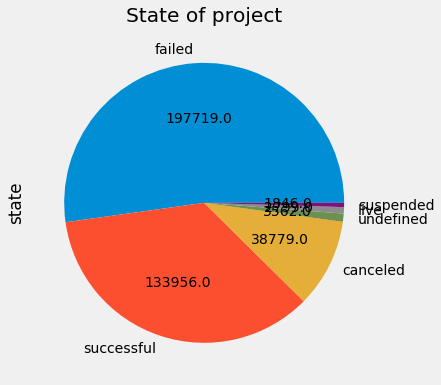

In [5]:
# autopct calculatrs the value back from the percentages
df.state.value_counts().plot(title='State of project',kind='pie', 
              autopct=lambda val: round((val * df.state.value_counts().sum()) / 100, 0), figsize=(6, 6))

**1c. Create a new "Completed" dataframe that removes any rows with state of 'live', 'undefined', or 'suspended'.**

In [6]:
comp = df[~df['state'].isin(['live', 'undefined', 'suspended'])]
completed = comp.set_index('name')

In [7]:
completed['state'].unique()

array(['failed', 'canceled', 'successful'], dtype=object)

**2a. What is the overall success rate for all completed kickstarter projects?**

In [8]:
# Percentage calculation
pct_state = (completed['state'].value_counts() / completed['state'].value_counts().sum()) * 100

In [9]:
# Pulling the success cell and rounding to two digits
success = round(pct_state.loc['successful'], 2)

In [10]:
print(f'The overall success rate of projects is {success}%.')

The overall success rate of projects is 36.16%.


**2b. Which 5 projects were pledged the most money (usd_pledged_real)?**

In [11]:
completed['usd_pledged_real'].nlargest(5)

name
Pebble Time - Awesome Smartwatch, No Compromises              20338986.27
COOLEST COOLER: 21st Century Cooler that's Actually Cooler    13285226.36
Pebble 2, Time 2 + All-New Pebble Core                        12779843.49
Kingdom Death: Monster 1.5                                    12393139.69
Pebble: E-Paper Watch for iPhone and Android                  10266845.74
Name: usd_pledged_real, dtype: float64

**2c. Which 5 projects had the most backers?** 

In [12]:
completed['backers'].nlargest(5)

name
Exploding Kittens                                          219382
Fidget Cube: A Vinyl Desk Toy                              154926
Bring Reading Rainbow Back for Every Child, Everywhere!    105857
The Veronica Mars Movie Project                             91585
Double Fine Adventure                                       87142
Name: backers, dtype: int64

**2d. Which year had the most competition? (# of projects)**

In [13]:
# Create a datetime object
completed['launched'] = pd.to_datetime(completed['launched'])

In [14]:
# Insert a new column with year only data
completed['year_only'] = completed['launched'].dt.year

In [15]:
# Count project number per year and get the index of the most active year
top_year = completed['year_only'].value_counts().idxmax()

In [16]:
print(f'The most competition was in {top_year}.')

The most competition was in 2015.


**3a. What is the success rate for all projects broken down by main_category?**

In [17]:
# Percentage calculation
pct_category = (completed['main_category'].value_counts() / completed['main_category'].value_counts().sum()) * 100

In [18]:
pct_category

Film & Video    16.812344
Music           13.295578
Publishing      10.540310
Games            9.373094
Technology       8.574614
Design           7.967521
Art              7.521312
Food             6.550071
Fashion          6.053383
Theater          2.928839
Comics           2.893747
Photography      2.881599
Crafts           2.337942
Journalism       1.261155
Dance            1.008492
Name: main_category, dtype: float64

**3b. Show a horizontal bar chart for project success rate by main_category, sorted by highest to lowest.**

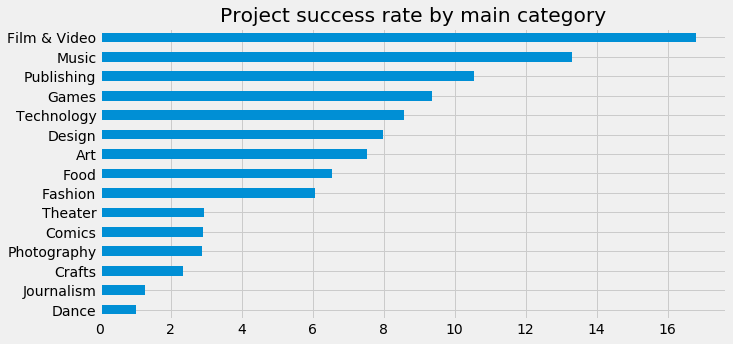

In [19]:
# Sorting from best to worst and plotting
pct_category_desc = pct_category.sort_values(ascending=True)
pct_category_desc.plot.barh(title='Project success rate by main category', figsize=(10,5))

**3c. Within the Games main_category, what is the success rate for each category within it?**

In [20]:
# Create filter
filt = completed['main_category'] == 'Games'

In [21]:
# Apply the filter and create a new DF
games = completed[filt]

In [22]:
# Calculate the percentages within the Games category
pct_games = (games['category'].value_counts() / games['category'].value_counts().sum()) * 100

In [23]:
pct_games

Tabletop Games     40.428534
Video Games        33.669326
Games               9.132275
Playing Cards       7.047202
Mobile Games        5.045647
Live Games          2.914495
Gaming Hardware     1.111655
Puzzles             0.650865
Name: category, dtype: float64

**4a. Calculate the 'pct_of_goal' for each completed project**

In [24]:
completed['pct_of_goal'] = (completed['pledged'] / completed['goal']) * 100

**4b. What were the top 5 projects when looking at pct_of_goal for all time?**

In [25]:
completed['pct_of_goal'].nlargest(5)

name
VULFPECK /// The Beautiful Game    10427789.0
Re-covering with Friends            6876410.0
VULFPECK /// Thrill of the Arts     5526657.0
Energy Hook                         4153501.0
Band of Brothers 2nd Chance         3284300.0
Name: pct_of_goal, dtype: float64

**4c. Plot a histogram distribution of all completed projects by pct_of_goal**

In [26]:
# Creating filters to see the distribution
below1 = completed['pct_of_goal'] < 1
range1_10 = (completed['pct_of_goal'] >= 1) & (completed['pct_of_goal'] < 10)
range10_100 = (completed['pct_of_goal'] >= 10) & (completed['pct_of_goal'] < 1000)
range100_1000 = (completed['pct_of_goal'] >= 100) & (completed['pct_of_goal'] < 1000)
over1000 = completed['pct_of_goal'] >= 1000

In [27]:
# Applying the filters
b1 = completed[below1]
r1_10 = completed[range1_10]
r10_100 = completed[range10_100]
r100_1000 = completed[range100_1000]
o1000 = completed[over1000]

In [28]:
n1 = b1['pct_of_goal'].count()
n2 = r1_10['pct_of_goal'].count()
n3 = r10_100['pct_of_goal'].count()
n4 = r100_1000['pct_of_goal'].count()
n5 = o1000['pct_of_goal'].count()

print(f'Project count by percentage range: \n1% or less: {n1}\n1%-10%: {n2}\n10%-100%: {n3}\n100%-1000%: {n4}\n1000% plus: {n5}')

Project count by percentage range: 
1% or less: 106243
1%-10%: 67252
10%-100%: 192840
100%-1000%: 130536
1000% plus: 4119


There are two big groups, one is 0-10, the other 100-110. Plotting the whole range at once would give a very skewed result.

Text(0, 0.5, 'Occurrence')

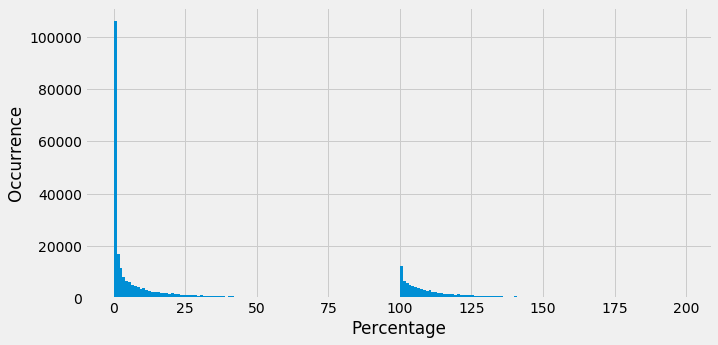

In [29]:
plot = completed['pct_of_goal'].hist(bins=range(200), figsize=(10,5))
plot.set_xlabel('Percentage')
plot.set_ylabel('Occurrence')

Text(0, 0.5, 'Occurrence')

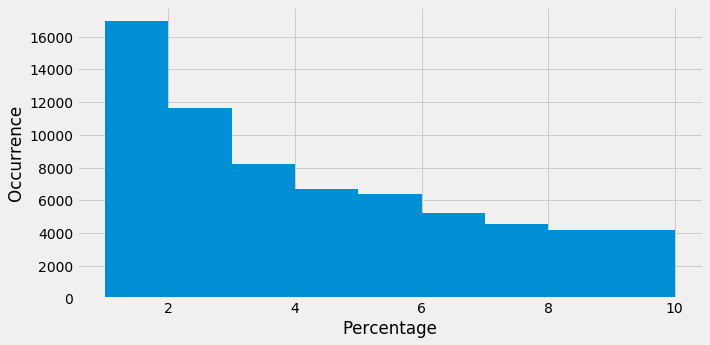

In [30]:
# Breakdown for 0%-10%
import numpy as np
count, division = np.histogram(completed['pct_of_goal'], 
                               bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

plot = completed['pct_of_goal'].hist(bins=division, figsize=(10,5))
plot.set_xlabel('Percentage')
plot.set_ylabel('Occurrence')

Text(0, 0.5, 'Occurrence')

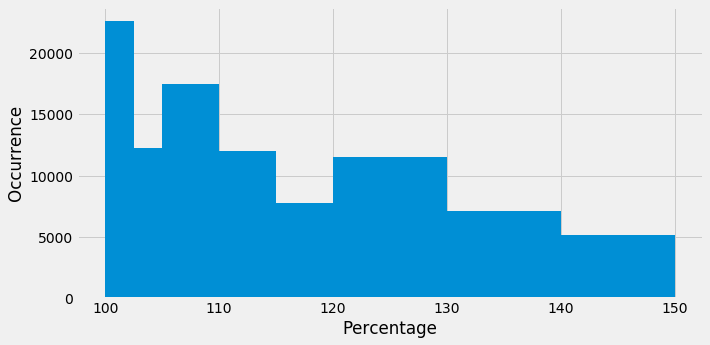

In [31]:
# Breakdown for 100%-150%
count, division = np.histogram(completed['pct_of_goal'], 
                               bins = [100, 102.5, 105, 110, 115, 120, 130, 140, 150])

plot = completed['pct_of_goal'].hist(bins=division, figsize=(10,5))
plot.set_xlabel('Percentage')
plot.set_ylabel('Occurrence')

Text(0, 0.5, 'Occurrence')

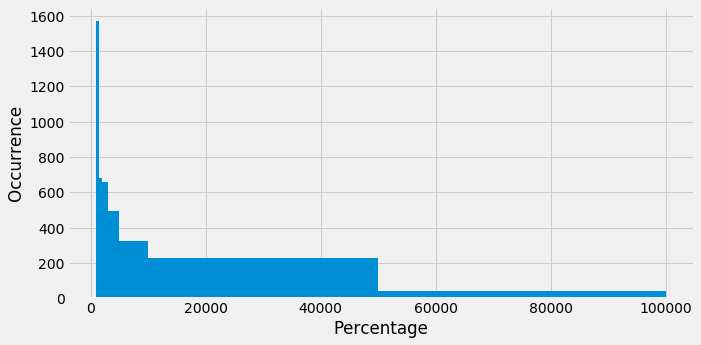

In [32]:
# Breakdown for 1000% plus
count, division = np.histogram(completed['pct_of_goal'], 
                               bins = [1000, 1500, 2000, 3000, 5000, 10000, 50000, 100000])

plot = completed['pct_of_goal'].hist(bins=division, figsize=(10,5))
plot.set_xlabel('Percentage')
plot.set_ylabel('Occurrence')

Solution by Marina, nice move with `bins100 = np.arange(0,120, 10)`

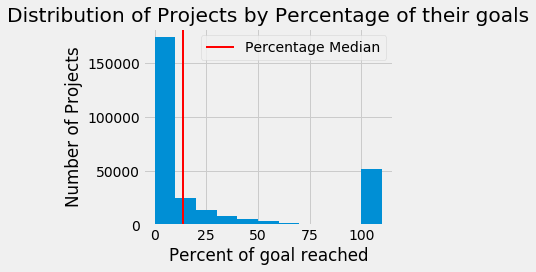

In [75]:
bins100 = np.arange(0,120, 10)
median = completed['pct_of_goal'].median() 
plt.style.use("fivethirtyeight")
plt.hist(completed.pct_of_goal, bins=bins100)
plt.title("Distribution of Projects by Percentage of their goals")
plt.xlabel("Percent of goal reached")
plt.ylabel("Number of Projects")
plt.axvline(median, color="red", label="Percentage Median", linewidth=2)
plt.legend()
plt.tight_layout()
plt.show()

**4d.** Create 2 histogram subplots by pct_of_goal: 1) state=successful, and 2) all others (failed)

In [34]:
# Will skip this considering what a mess just 1 plot was

**5a. What is the average usd_goal_real for all completed kickstarter projects, broken down by main_category.**

In [35]:
# Group 'main_category' by average and median
average = completed.groupby('main_category').mean()
median = completed.groupby('main_category').median()

In [36]:
average['usd_goal_real'].nlargest(10)

main_category
Technology      102154.155936
Film & Video     82375.686055
Journalism       65528.614392
Food             48661.356201
Games            45148.243871
Design           42199.323873
Art              39467.623304
Theater          27147.451041
Publishing       22590.745149
Fashion          22530.494784
Name: usd_goal_real, dtype: float64

**5b. What is the median usd_goal_real for all completed kickstarter projects, broken down by main_category.**

In [37]:
median['usd_goal_real'].nlargest(10)

main_category
Technology      20000.00
Design          10000.00
Food            10000.00
Games            8000.00
Film & Video     7000.00
Fashion          5983.55
Journalism       5000.00
Publishing       5000.00
Music            4000.00
Photography      4000.00
Name: usd_goal_real, dtype: float64

**5c. What is the average usd_pledged_real for all completed kickstarter projects, broken down by main_category.**

In [38]:
average['usd_pledged_real'].nlargest(10)

main_category
Design          24546.889746
Games           21288.432988
Technology      21186.435891
Comics           6653.781332
Film & Video     6248.147383
Fashion          5762.372201
Food             5140.292239
Theater          4016.933189
Music            3924.105566
Photography      3584.669190
Name: usd_pledged_real, dtype: float64

**5d.What is the median usd_pledged_real for all completed kickstarter projects, broken down by main_category.**

In [39]:
median['usd_pledged_real'].nlargest(10)

main_category
Design          1925.850
Dance           1865.565
Theater         1567.000
Comics          1506.500
Games           1324.960
Music           1010.495
Film & Video     760.000
Art              431.340
Technology       317.000
Publishing       291.440
Name: usd_pledged_real, dtype: float64

**5e. What insights does this information provide?**

Design, games and technology are the categories raising the biggest amounts on average. 
On the other hand, while technology is the one with the highest  raising goals, design and technology are just on positions 5 and 6, with a sum less than half of that of technology. Every other category is far behind those three, e.g. comics on place 4 having raised just 30% of it.

**5f. Based on this information, if someone wanted to choose the main_category with the highest combined success rate and pledged dollar amount, which one would you recommend?** 

In [40]:
# Filter to get the successful projects only
success_filter = completed['state'] == 'successful'

In [41]:
# Filtering the main_category by successful
success_categories = completed.loc[success_filter, 'main_category']

In [42]:
# Totals project number per category
success_categories.value_counts()

Music           24197
Film & Video    23623
Games           12518
Publishing      12300
Art             11510
Design          10550
Theater          6534
Technology       6434
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: main_category, dtype: int64

In [43]:
# Calculating the success rate per category and rounding to two decimals
success_rate = (success_categories.value_counts() * 100) / completed['main_category'].value_counts()
success_rate = success_rate.round(2)

In [44]:
success_rate.sort_values(ascending=False)

Dance           62.58
Theater         60.22
Comics          54.50
Music           49.13
Art             41.31
Film & Video    37.93
Games           36.05
Design          35.74
Publishing      31.50
Photography     30.96
Food            25.08
Fashion         24.94
Crafts          24.42
Journalism      21.66
Technology      20.25
Name: main_category, dtype: float64

In [45]:
# Calculating the 'investing value' by multiplying the amount raised with success rate
category_value = (average['usd_pledged_real'] * success_rate).sort_values(ascending=False)
category_value = category_value.round(2)

In [46]:
category_value.sort_values(ascending=False)

main_category
Design          877305.84
Games           767448.01
Technology      429025.33
Comics          362631.08
Theater         241899.72
Film & Video    236992.23
Dance           217650.87
Music           192791.31
Fashion         143713.56
Art             133675.02
Food            128918.53
Photography     110981.36
Publishing      107048.24
Journalism       57215.26
Crafts           40327.41
dtype: float64

If someone wants to choose the best category in terms of success / money raised it would be Design folowed by Games. Though this is strongly influenced by the amount raised. 

If one wants to maximize the success rate and but still keep money raised in mind a strong contender would be Comics which is 4th by money raised but with a great success rate of over 50%. 

If success rate is what you go by there is no way around Dance which has the highest success rate (62%) and while not rasing a lot of money in total, does raise high sum contributions as it sits in 2nd place with a median pledged amount of $1.865.55.

**6a. Create a new column 'months' that shows how many months the project was active between launch and deadline.**


In [47]:
# Transforming to datetime object ('launched' already is one).
completed['deadline'] = pd.to_datetime(completed['deadline'])

In [48]:
# Calculating with division and creating month unit with numpy
completed['months'] = (completed['deadline'] - completed['launched']) / np.timedelta64(1, 'M')

**6b. Compare the avg months for successful projects vs non-successful. Add visuals if you'd like.**

In [49]:
# Filter non successful ones (successful ones we already have)
no_success_filter = (completed['state'] == 'failed') | (completed['state'] == 'canceled')
failed_filter = completed['state'] == 'failed'
canceled_filter = completed['state'] == 'canceled'

In [50]:
completed.loc[no_success_filter, 'months'].mean()

1.1537727416745627

In [51]:
completed.loc[failed_filter, 'months'].mean()

1.137119895199376

In [52]:
completed.loc[canceled_filter, 'months'].mean()

1.2386791124481118

In [53]:
completed.loc[success_filter, 'months'].mean()

1.0377933314532855

It seems there are no significant differences in run time but successful ones tend to finish earlier. In any case, after 1 month the latest it should be clear if it is going to succeed or no.

**6c. Does the length of a project in months seem to have an impact?**

No, that does not seem to be the case

**7a. Calculate the expected value for the Games: Video Games category, with the expected value defined as: (median of usd_pledged_real) * (success rate of completed projects).**

In [92]:
# Create games filter
games_filter = completed['main_category'] == 'Games'

In [93]:
# Create DF with only games
games_df = completed[games_filter]

In [94]:
# Create video games filter
video_games_filter = games_df['category'] == 'Video Games'

In [95]:
# Create DF with only video games
video_games_df = games_df[video_games_filter]

In [96]:
# Filter for the successful video games
vg_success = video_games_df['state'] == 'successful'

In [97]:
vg_median = video_games_df['usd_pledged_real'].median()

In [98]:
vg_success_rate = (video_games_df.loc[vg_success, 'state'].count() * 100) / video_games_df['state'].count()

In [99]:
# Expected value
vg_median * vg_success_rate

8512.740227525448

In [100]:
vg_success_rate

20.408861517406553

**7b. Do this again but broken down by deadline year**

In [166]:
pd.options.mode.chained_assignment = None # Disabling `SettingWithCopyWarning`
video_games_df['deadline_year'] = video_games_df['deadline'].dt.year

In [102]:
# Looping over a list of years, making calculations with filtered values, then creating a frequency table
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
expected_values = {}

for year in years:
    median = video_games_df[video_games_df['deadline_year'] == year]['usd_pledged_real'].median()
    success_rate = (video_games_df.loc[(video_games_df['deadline_year'] == year) & (video_games_df['state'] == 'successful'), 'state'].count() * 100) / video_games_df[video_games_df['deadline_year'] == year]['state'].count()
    expected_values[year] = median * success_rate   

In [103]:
years_expected_values = pd.Series(expected_values)
years_expected_values

2009     8625.000000
2010     8079.470199
2011     7960.725076
2012    16637.575586
2013    27168.220413
2014    10029.529244
2015     3201.498638
2016     4967.580145
2017     5704.391691
2018        0.000000
dtype: float64

**7c. Show this in a bar chart**

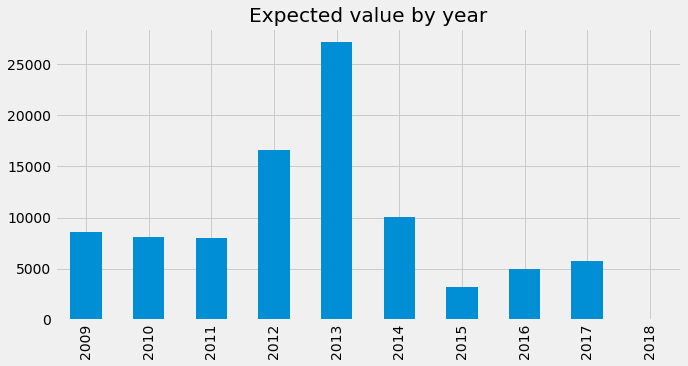

In [159]:
years_expected_values.plot.bar(title='Expected value by year', figsize=(10,5))

**8a. Calculate the project count, success rate, and pct_of_goal for all projects with 'planner' in the name. Check for spelling variations in upper/lowercase.**

In [142]:
# Creating a new DF, not case sensitive and ignoring NA's
planner_df = completed[completed['name'].str.contains('planner', case=False, na=False)]

In [145]:
# Project count
planner_df['name'].count()

356

In [167]:
# Success rate
(planner_df.loc[(planner_df['state'] == 'successful'), 'state'].count() * 100) / planner_df['state'].count()

35.95505617977528

In [174]:
# Average pct of goal
round(planner_df['pct_of_goal'].mean(), 2)

199.67

**8b. How about all projects with both 'planner' and 'Panda' in the name?**

In [289]:
planner_panda_df = completed[(completed['name'].str.contains('planner', case=False, na=False)) & (completed['name'].str.contains('panda', case=False, na=False))]

In [292]:
# Count
planner_panda_df['name'].count()

1

In [293]:
# Success rate
(planner_panda_df.loc[(planner_df['state'] == 'successful'), 'state'].count() * 100) / planner_panda_df['state'].count()

100.0

In [294]:
# Average pct of goal
round(planner_panda_df['pct_of_goal'].mean(), 2)

269.44